In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [33]:
data = pd.read_csv('../data/salaries.csv')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12869 entries, 0 to 12868
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           12869 non-null  int64 
 1   experience_level    12869 non-null  object
 2   employment_type     12869 non-null  object
 3   job_title           12869 non-null  object
 4   salary              12869 non-null  int64 
 5   salary_currency     12869 non-null  object
 6   salary_in_usd       12869 non-null  int64 
 7   employee_residence  12869 non-null  object
 8   remote_ratio        12869 non-null  int64 
 9   company_location    12869 non-null  object
 10  company_size        12869 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [35]:
data.kurt(numeric_only=True)

work_year           2.615312
salary           3260.771792
salary_in_usd       6.724388
remote_ratio       -1.530245
dtype: float64

In [36]:
data['salary'].describe()

count    1.286900e+04
mean     1.672187e+05
std      3.808204e+05
min      1.400000e+04
25%      1.040000e+05
50%      1.422000e+05
75%      1.880000e+05
max      3.040000e+07
Name: salary, dtype: float64

<Axes: >

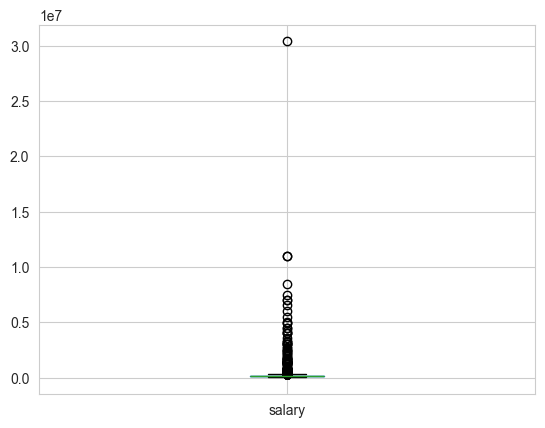

In [37]:
data.boxplot(column=['salary'])

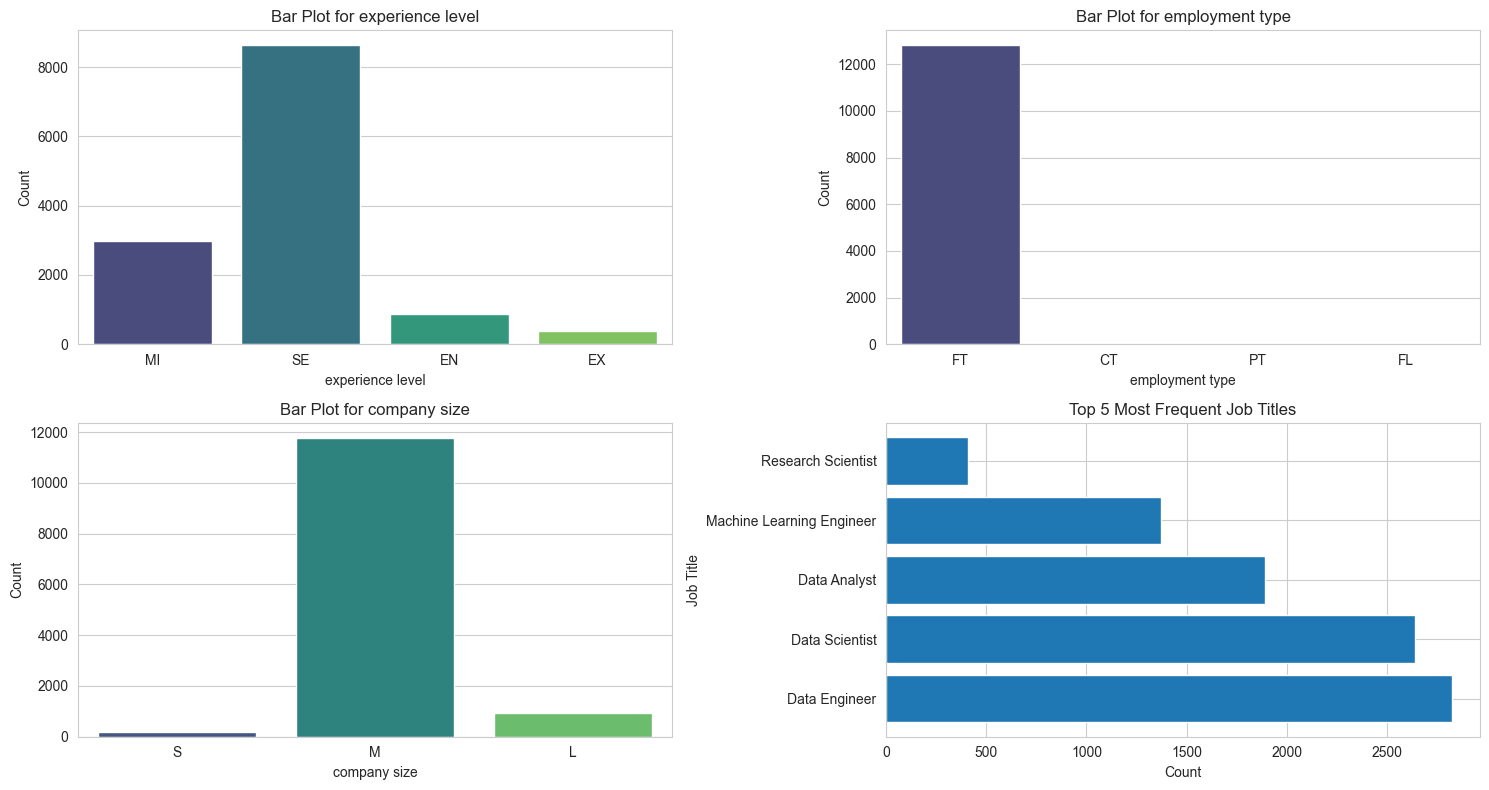

In [64]:
# Extract top job titles and filter data
top_job_titles = data['job_title'].value_counts().nlargest(5).index

filtered_data = data[data['job_title'].isin(top_job_titles)]


# Set up a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot bar charts for selected columns
selected_columns = ['experience_level', 'employment_type', 'company_size']
for i, column in enumerate(selected_columns):
    sns.countplot(x=column, data=data, palette="viridis", hue=column, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Bar Plot for {column.replace("_", " ")}')
    axes[i//2, i%2].set_xlabel(column.replace("_", " "))
    axes[i//2, i%2].set_ylabel('Count')

# Plot horizontal bar chart for top job titles
axes[1, 1].barh(top_job_titles, filtered_data['job_title'].value_counts().loc[top_job_titles])
axes[1, 1].set_title('Top 5 Most Frequent Job Titles')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Job Title')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


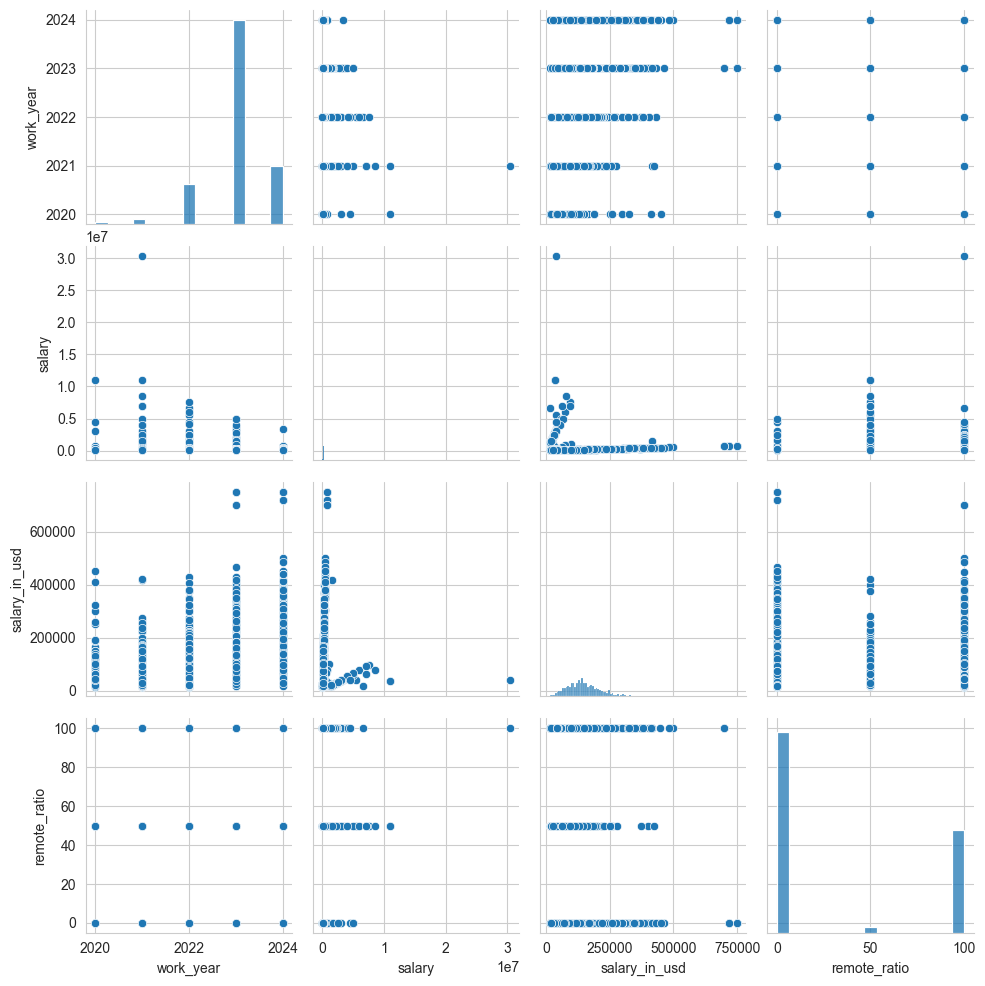

In [44]:
sns.pairplot(data)